# Wilson score

Wilson score is a method to estimate confidence interval of binomial proportions by sampling result. (success–failure experiments)

Given $n, n_S, cl$ as following:

$n$ : sample

$n_S$ : number of success

$cl$ : confidence interval

and set

$n_F = n - n_S$, number of failure

$z$ : percent point of standard normal distribution for $cl$ 

The estimate to success proportion of population $p$ is 

$$p < \frac{n_S + \frac{z^2}{n} + z\sqrt{\frac{n_{S}n_{F}}{n} + \frac{z^2}{n}}}{n+z^2}$$


It works even for a small number sample or an extreme probability.



In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def wilson_score(sample, hit, cl):
    if (cl >= 1) or (cl <= 0):
            raise ValueError("cl error, expect 0~1, got {}".format(cl))
    
    z = scipy.stats.norm.ppf(cl)
    z2 = z**2
    output = (hit + (z2/2))/(sample + z2)
    output += (z/(sample+z2))*np.sqrt((hit*(sample - hit)/sample) + (z2/4))
    return output

def find_suitable_sample(sample_failure, population, failure_upper_bound, confidence_level):
    output = int(population/failure_upper_bound)
    while wilson_score(output, sample_failure, confidence_level) >= failure_upper_bound/population:
        output += 1
    
    return output

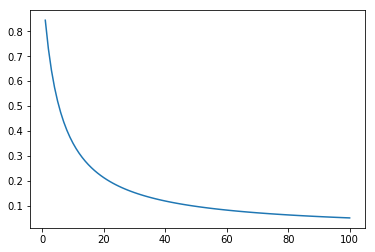

In [13]:
p = np.zeros(100)
for t in range(100):
    p[t] = wilson_score(t+1, 0, 0.99)


plt.plot(np.arange(100)+1, p)
plt.show()

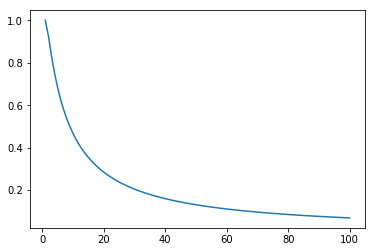

In [15]:
p = np.zeros(100)
for t in range(100):
    p[t] = wilson_score(t+1, 1, 0.99)

# p = np.log(p)

plt.plot(np.arange(100)+1, p)
plt.show()

In [16]:
find_suitable_sample(0, 50000, 500, 0.95)

268